# Pre-process of scATAC-seq dataset

In [2]:
library(SnapATAC)
library(GenomicRanges)

Loading required package: Matrix

Loading required package: rhdf5

Warning message:
“no DISPLAY variable so Tk is not available”
Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:Matrix’:

    expand, unname


The following objects are masked from ‘package:base’:

    expand.gr

In [5]:
file = '../data/processed/snap/EB1_atac.frag.snap'
file_barcode = '../data/processed/snap/EB1_atac_barcode.txt'
file_bins = '../data/processed/snap/EB1_atac_bins.txt'
file_count = '../data/processed/snap/EB1_atac_count.txt'
file_metric = '../data/raw/EB1_count/EB1-count/outs/per_barcode_metrics.csv'
file_peak = '../data/processed/snap/EB1_atac_peak.txt'
file_peak_count = '../data/processed/snap/EB1_atac_peak_count.txt'
sample = 'EB1'
bin.size = 5000

## Create snap object from input data

In [4]:
atac_snap <- newSnap()

df_barcode <- read.table(file = file_barcode, quote = '', stringsAsFactors = F)
barcode <- df_barcode$V1

In [5]:
TN <- h5read(file, "/BD/TN")
UM <- h5read(file, "/BD/UM")
PP <- h5read(file, "/BD/PP")
UQ <- h5read(file, "/BD/UQ")
CM <- h5read(file, "/BD/CM")
metaData <- data.frame(barcode, TN, UM, PP, UQ, CM)

In [6]:
atac_snap@metaData <- metaData
atac_snap@barcode <- barcode
atac_snap@des <- character()
atac_snap@sample <- rep(sample, length(barcode))
atac_snap@file <- rep(normalizePath(file), length(barcode))

In [7]:
if (exists("h5closeAll", where = "package:rhdf5", mode = "function")) {
    rhdf5::h5closeAll()
} else {
    rhdf5::H5close()
}
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,4532727,242.1,9079865,485.0,5837700,311.8
Vcells,8300668,63.4,12255594,93.6,10146329,77.5


In [8]:
df_bins <- read.table(file_bins, header = T, sep = '\t', quote = '', stringsAsFactors = F)
binChrom <- df_bins$binChrom
binStart <- df_bins$binStart
binEnd <- df_bins$binEnd
bins = GRanges(binChrom, IRanges(as.numeric(binStart),binEnd), name=paste(paste(binChrom, binStart, sep=":"), binEnd, sep="-"))

In [9]:
atac_snap@bmat <- Matrix(0, 0, 0)
binSizeList <- h5read(file, '/AM/binSizeList')
atac_snap@feature <- bins

In [10]:
df_count <- read.table(file_count, header = T, sep = '\t', quote = '', stringsAsFactors = F)
nBarcode = length(barcode);
nBin = length(atac_snap@feature);
M = sparseMatrix(i=df_count$idx, j=df_count$idy, x=df_count$count, dims=c(nBarcode, nBin));
rownames(M) = barcode;
atac_snap@bmat = M[match(atac_snap@barcode, rownames(M)),]
rm(M, df_count)

In [11]:
atac_snap@bmat

56506 x 642098 sparse Matrix of class "dgCMatrix"
                                                                                         
AAACAGCCAAACAACA-1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
AAACAGCCAAACTCAT-1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
AAACAGCCAACAACAA-1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
AAACAGCCAACAGGTG-1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
AAACAGCCAAGTGTCC-1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
AAACAGCCAATAACCT-1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
AAACAGCCAATATAGG-1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
AAACAGCCAATTAAGG-1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
AAACAGCCACAAAGAC-1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
AAACAGCCACAATACT-1 . . . . . . . . . . . . . . . .

In [12]:
saveRDS(atac_snap, '../output/atac_snap_EB1_bmat.rds')

## Filter scATAC-seq bins

In [2]:
library(SnapATAC)
library(GenomicRanges)

Loading required package: Matrix

Loading required package: rhdf5

Warning message:
“no DISPLAY variable so Tk is not available”
Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:Matrix’:

    expand, unname


The following objects are masked from ‘package:base’:

    expand.gr

In [4]:
atac_snap <- readRDS('../output/atac_snap_EB1_bmat.rds')

In [7]:
atac_snap <- makeBinary(atac_snap, mat="bmat")

In [9]:
# Filter bins within black list of the genome

black_list = read.table("../data/database/hg38.blacklist.bed.gz")
black_list.gr = GRanges(black_list[,1], IRanges(black_list[,2], black_list[,3]))
idy = queryHits(findOverlaps(atac_snap@feature, black_list.gr))
if(length(idy) > 0){
    atac_snap = atac_snap[, -idy, mat="bmat"]
}

In [24]:
# Filter bins based on the chromosome

chr.exclude = seqlevels(atac_snap@feature)[grep("random|chrM|alt|chrUn", seqlevels(atac_snap@feature))]
idy = grep(paste(chr.exclude, collapse="|"), atac_snap@feature)
if(length(idy) > 0){
    atac_snap = atac_snap[, -idy, mat="bmat"]
}

In [31]:
# Filter genes based on bin coverage (top 5% was omitted)

bin.cov = log10(Matrix::colSums(atac_snap@bmat) + 1)
bin.cutoff = quantile(bin.cov[bin.cov > 0], 0.95)
idy = which(bin.cov <= bin.cutoff & bin.cov > 0)
atac_snap = atac_snap[, idy, mat="bmat"]

number of barcodes: 56506
number of bins: 542828
number of genes: 0
number of peaks: 0
number of motifs: 0

In [32]:
# Bins with more than 1000 reads were kept

idx = which(Matrix::rowSums(atac_snap@bmat) > 1000)
atac_snap = atac_snap[idx, ]

number of barcodes: 34208
number of bins: 542828
number of genes: 0
number of peaks: 0
number of motifs: 0

In [33]:
saveRDS(atac_snap, '../output/atac_snap_EB1_filtered.rds')

## Perform normalization and dimention reduction with PCA

In [3]:
library(SnapATAC)
library(GenomicRanges)
library(leiden)

install dependencies (yes/no)?

no (use interactive mode)

Unable to install python modules igraph and leidenalg

run in terminal:

conda install -n r-reticulate -c conda-forge vtraag python-igraph pandas umap learn

python modules igraph and leidenalg installed



In [4]:
atac_snap <- readRDS('../output/atac_snap_EB1_filtered.rds')

In [7]:
df_metric <- read.table(file = file_metric, quote = '', sep = ',', header = T, stringsAsFactors = F)
meta_umi <- df_metric[, c('barcode', 'atac_fragments')]
meta_umi$logUMI <- log(df_metric$atac_fragments)
meta_umi[is.infinite(meta_umi$logUMI), 'logUMI'] <- 0
meta_temp <- atac_snap@metaData
atac_snap@metaData <- merge(meta_temp, meta_umi, by='barcode')

In [8]:
row.covs.dens <- density(x = atac_snap@metaData[, "logUMI"], bw = 'nrd', adjust = 1)
sampling_prob <- 1 / (approx(x = row.covs.dens$x, y = row.covs.dens$y, xout = atac_snap@metaData[, "logUMI"])$y + .Machine$double.eps)
set.seed(123)
idx.landmark.ds <- sort(sample(x = seq(nrow(atac_snap)), size = 10000, prob = sampling_prob))

In [9]:
atac_snap_landmark = atac_snap[idx.landmark.ds, ]
atac_snap_query = atac_snap[-idx.landmark.ds, ]

In [10]:
atac_snap_landmark = runDiffusionMaps(obj = atac_snap_landmark, input.mat="bmat", num.eigs=50)
atac_snap_landmark@metaData$landmark = 1
atac_snap_query = runDiffusionMapsExtension(obj1 = atac_snap_landmark, obj2 = atac_snap_query, input.mat = "bmat")
atac_snap_query@metaData$landmark = 0

Epoch: checking the inputs ...

Epoch: computing jaccard similarity matrix ...

Epoch: fitting regression model ...

Epoch: performing normalization ...

Epoch: computing eigen decomposition ...

Use igraph::arpack for eig decomposition.

Epoch: Done

Epoch: checking the inputs ...

Epoch: computing jaccard similarity matrix ...

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.8 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.8 GiB”
Epoch: performing normalization ...

Epoch: projecting query cells to the reference ...

Epoch: Done



In [11]:
atac_snap = snapRbind(atac_snap_landmark, atac_snap_query)
atac_snap@metaData$sample <- rep(sample, nrow(atac_snap@metaData))
atac_snap = atac_snap[order(atac_snap@metaData[,"sample"])]

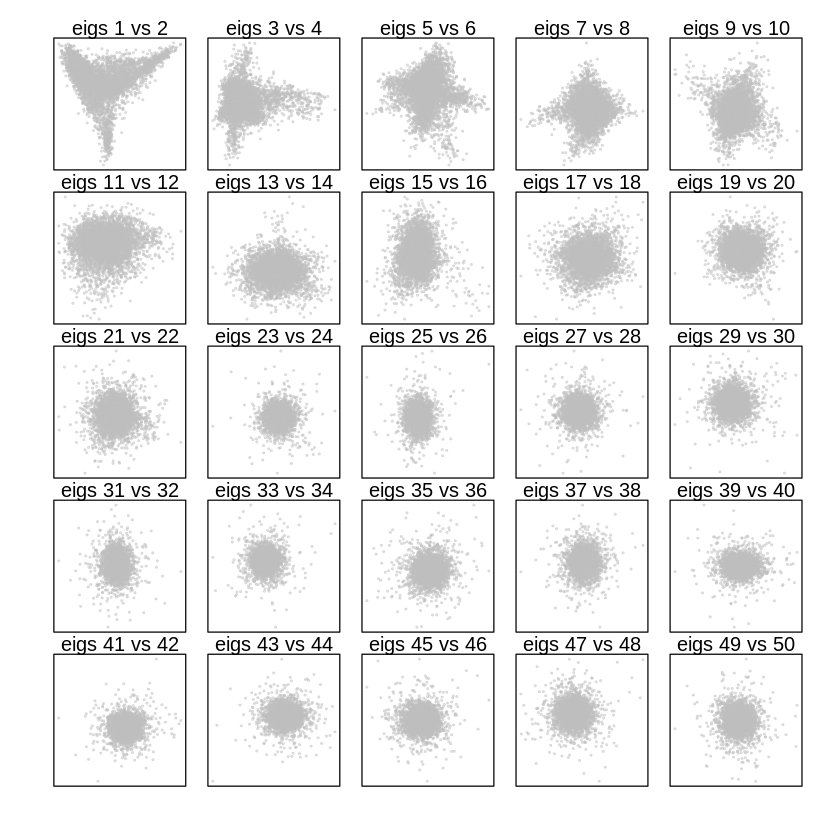

In [12]:
plotDimReductPW(
    obj=atac_snap, 
    eigs.dims=1:50,
    point.size=0.3,
    point.color="grey",
    point.shape=19,
    point.alpha=0.6,
    down.sample=5000,
    pdf.file.name=NULL, 
    pdf.height=7, 
    pdf.width=7
  )

## Clustering based on top 12 eigenvectors of input data

> Rationale for selecting number of eigenvectors: irregular graph in the previous plot

In [ ]:
atac_snap = runKNN(obj=atac_snap, eigs.dims=1:12, k=10)
atac_snap = runCluster(obj=atac_snap, tmp.folder=tempdir(), louvain.lib="leiden", seed.use=10, resolution=0.7)

In [14]:
saveRDS(atac_snap, '../output/atac_snap_EB1_clustered.rds')

## UMAP projection of cells

In [1]:
library(SnapATAC)
library(GenomicRanges)
library(leiden)
library(umap)
library(Seurat)
library(SeuratData)
library(rtracklayer)

Loading required package: Matrix

Loading required package: rhdf5

Warning message:
“no DISPLAY variable so Tk is not available”
Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:Matrix’:

    expand, unname


The following objects are masked from ‘package:base’:

    expand.gr

In [2]:
file = '../data/processed/snap/EB1_atac.frag.snap'
file_barcode = '../data/processed/snap/EB1_atac_barcode.txt'
file_bins = '../data/processed/snap/EB1_atac_bins.txt'
file_count = '../data/processed/snap/EB1_atac_count.txt'
file_metric = '../data/raw/EB1_count/EB1-count/outs/per_barcode_metrics.csv'
sample = 'EB1'
bin.size = 5000

In [3]:
atac_snap <- readRDS('../output/atac_snap_EB1_clustered.rds')

In [4]:
atac_snap = runViz(obj=atac_snap, tmp.folder=tempdir(), dims=2, eigs.dims=1:20, method="umap", seed.use=10)

Use umap package to run umap.



In [5]:
png('../figure/umap_atac.png', width = 1000, height = 1000)
par(mfrow = c(2, 2))
plotViz(obj=atac_snap, method="umap", main="Cluster", point.color=atac_snap@cluster, point.size=0.2, point.shape=19, text.add=TRUE, text.size=1, text.color="black", down.sample=10000, legend.add=FALSE)
plotFeatureSingle(obj=atac_snap, feature.value=atac_snap@metaData[,"logUMI"], method="umap", main="Read Depth", point.size=0.2, point.shape=19, down.sample=10000, quantiles=c(0.01, 0.99))
plotViz(obj=atac_snap, method="umap", main="Sample", point.size=0.2, point.shape=19, point.color=atac_snap@sample, text.add=FALSE, text.size=1.5, text.color="black", down.sample=10000, legend.add=TRUE)
plotViz(obj=atac_snap, method="umap", main="Landmark", point.size=0.2, point.shape=19, point.color=atac_snap@metaData[,"landmark"], text.add=FALSE, text.size=1.5, text.color="black", down.sample=10000, legend.add=TRUE)
dev.off()

png 
  2

## Annotation of cell types based on paired reference scRNA-seq dataset

In [6]:
rna_snap_seurat <- readRDS('../data/EB1_count_reference.rds')

In [7]:
rna_snap_seurat$tech = "rna"
variable.genes = VariableFeatures(object = rna_snap_seurat)

In [8]:
gtf <- rtracklayer::import('../data/database/gencode.v43.annotation.gtf')
gtf <- as.data.frame(gtf)
gtf_gene <- gtf[which(gtf$type == 'gene'), c('seqnames', 'start', 'end', 'gene_name')]

In [9]:
genes.gr = GRanges(gtf_gene[,1], IRanges(gtf_gene[,2], gtf_gene[,3]), name=gtf_gene[,4])
genes.sel.gr = genes.gr[which(genes.gr$name %in% variable.genes)]

In [10]:
atac_snap = createGmatFromMat(obj=atac_snap, input.mat="bmat", genes=genes.sel.gr, do.par=TRUE, num.cores=4)

In [11]:
saveRDS(atac_snap, '../output/atac_snap_EB1_gmat.rds')
saveRDS(genes.sel.gr, '../output/genes_grange.rds')

In [2]:
library(SnapATAC)
library(GenomicRanges)
library(leiden)
library(umap)
library(Seurat)
library(SeuratData)
library(rtracklayer)

Loading required package: Matrix

Loading required package: rhdf5

Warning message:
“no DISPLAY variable so Tk is not available”
Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:Matrix’:

    expand, unname


The following objects are masked from ‘package:base’:

    expand.gr

In [3]:
atac_snap <- readRDS('../output/atac_snap_EB1_gmat.rds')
genes.sel.gr <- readRDS('../output/genes_grange.rds')
rna_snap_seurat <- readRDS('../data/EB1_count_reference.rds')

In [4]:
rna_snap_seurat$tech = "rna"
variable.genes = VariableFeatures(object = rna_snap_seurat)

In [5]:
atac_snap_seurat <- snapToSeurat(obj=atac_snap, eigs.dims=1:20, norm=TRUE, scale=TRUE)
transfer.anchors <- FindTransferAnchors(reference = rna_snap_seurat, query = atac_snap_seurat, features = variable.genes, reference.assay = "RNA", query.assay = "ACTIVITY", reduction = "cca")

Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”
Centering and scaling data matrix

Warning message:
“74 features of the features specified were not present in both the reference query assays. 
Continuing with remaining 2201 features.”
Warning message in RunCCA.Seurat(object1 = reference, object2 = query, features = features, :
“Running CCA on different assays”
Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 103792 anchors

Filtering anchors

	Retained 21651 anchors



In [9]:
celltype.predictions <- TransferData(anchorset = transfer.anchors, refdata = rna_snap_seurat$predicted.annotation.l2, weight.reduction = atac_snap_seurat[["SnapATAC"]], dims = 1:20)

Finding integration vectors

Finding integration vector weights

Predicting cell labels



In [10]:
atac_snap@metaData$predicted.id = celltype.predictions$predicted.id
atac_snap@metaData$predict.max.score = apply(celltype.predictions[,-1], 1, max)
atac_snap@cluster = as.factor(atac_snap@metaData$predicted.id)

In [13]:
refdata <- GetAssayData(object = rna_snap_seurat, assay = "RNA", slot = "data")
imputation <- TransferData(anchorset = transfer.anchors, refdata = refdata, weight.reduction = atac_snap_seurat[["SnapATAC"]], dims = 1:20)
atac_snap@gmat = t(imputation@data)

Finding integration vectors

Finding integration vector weights

Transfering 19455 features onto reference data



In [14]:
rm(imputation)
rm(refdata)
rm(rna_snap_seurat)
rm(atac_snap_seurat)

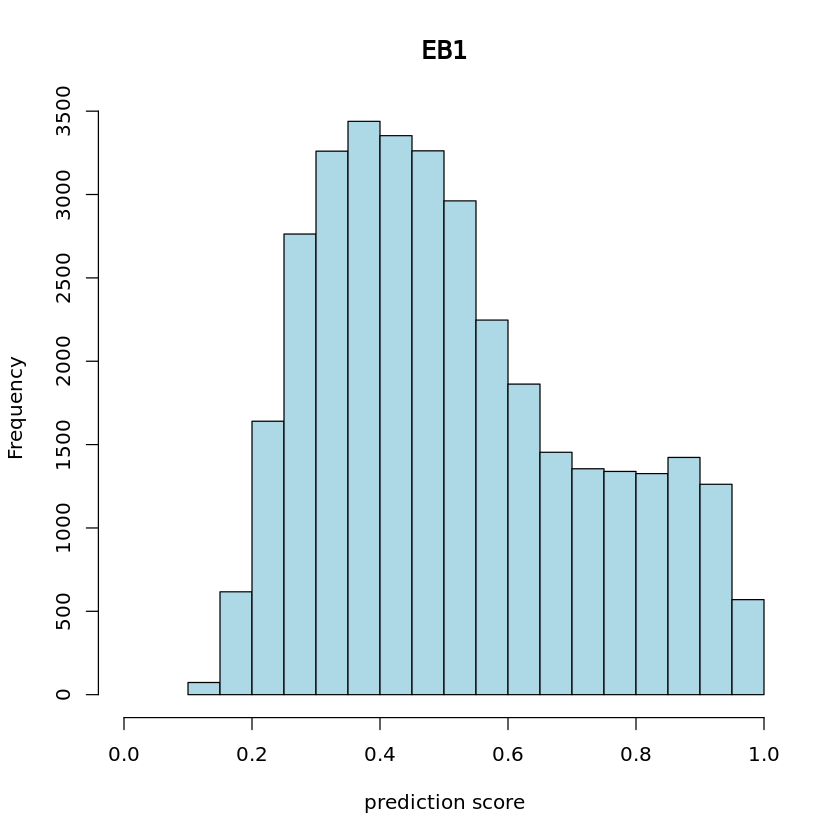

In [15]:
hist(atac_snap@metaData$predict.max.score, xlab="prediction score", col="lightblue", xlim=c(0, 1), main="EB1")

In [18]:
table(atac_snap@metaData$predict.max.score > 0.5)


FALSE  TRUE 
18407 15801 

In [ ]:
# Select prediction score more than 0.5

atac_snap = atac_snap[atac_snap@metaData$predict.max.score > 0.5, ]
atac_snap

number of barcodes: 15801
number of bins: 542828
number of genes: 19455
number of peaks: 0
number of motifs: 0

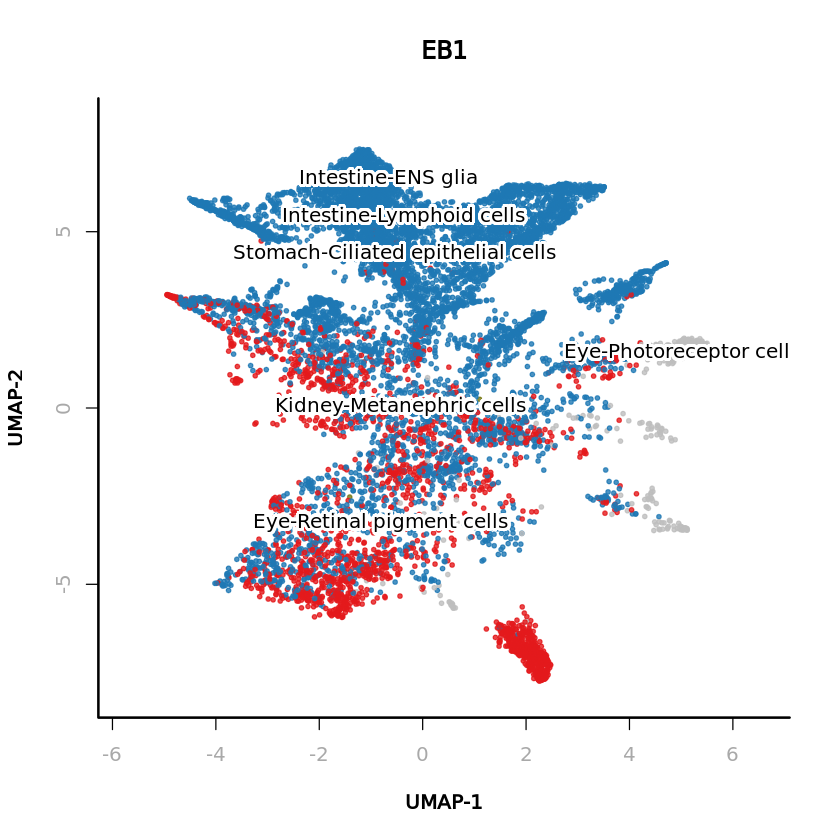

In [21]:
plotViz(obj = atac_snap, method="umap", main="EB1", point.color=atac_snap@metaData[,"predicted.id"], point.size=0.5, point.shape=19, text.add=TRUE, text.size=1, text.color="black", down.sample=10000, legend.add=FALSE)

In [22]:
saveRDS(atac_snap, '../output/atac_snap_EB1_mapped.rds')

## Aggregate bins to peaks in the genome

In [6]:
library(SnapATAC)
library(GenomicRanges)
library(leiden)
library(umap)
library(Seurat)
library(SeuratData)
library(rtracklayer)
library(parallel)

In [3]:
atac_snap <- readRDS('../output/atac_snap_EB1_mapped.rds')

In [4]:
clusters.sel = names(table(atac_snap@cluster))[which(table(atac_snap@cluster) > 100)]
clusters.sel

[1] "Eye-Photoreceptor cells"           "Eye-Retinal pigment cells"        
[3] "Stomach-Ciliated epithelial cells"

In [ ]:
peaks.ls = mclapply(seq(clusters.sel), function(i){
    print(clusters.sel[i]);
    peaks = runMACS(
        obj=atac_snap[which(atac_snap@cluster==clusters.sel[i]),], 
        output.prefix=paste0("EB1.", gsub(" ", "_", clusters.sel)[i]),
        path.to.snaptools="/gpfs/gibbs/pi/gerstein/zw363/conda_envs/snaptools/bin/snaptools",
        path.to.macs="/gpfs/gibbs/pi/gerstein/zw363/conda_envs/snapatac/bin/macs2",
        gsize="hs",
        buffer.size=500, 
        num.cores=1,
        macs.options="--nomodel --shift 100 --ext 200 --qval 5e-2 -B --SPMR",
        tmp.folder=tempdir()
    )
    peaks
}, mc.cores=4)

In [10]:
peaks.names = system("ls | grep narrowPeak", intern=TRUE)
peak.gr.ls = lapply(peaks.names, function(x){
    peak.df = read.table(x)
    GRanges(peak.df[,1], IRanges(peak.df[,2], peak.df[,3]))
})
peak.gr = reduce(Reduce(c, peak.gr.ls))

In [17]:
peaks.df = as.data.frame(peak.gr)[, 1:3]
write.table(peaks.df,file = "peaks.combined.bed",append=FALSE,
	quote= FALSE,sep="\t", eol = "\n", na = "NA", dec = ".", 
	row.names = FALSE, col.names = FALSE, qmethod = c("escape", "double"),
	fileEncoding = "")

## Create peak matrix

In [2]:
library(SnapATAC)
library(GenomicRanges)
library(leiden)
library(umap)
library(Seurat)
library(SeuratData)
library(rtracklayer)
library(parallel)

Loading required package: Matrix

Loading required package: rhdf5

Warning message:
“no DISPLAY variable so Tk is not available”
Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:Matrix’:

    expand, unname


The following objects are masked from ‘package:base’:

    expand.gr

In [3]:
atac_snap <- readRDS('../output/atac_snap_EB1_mapped.rds')

In [6]:
df_peak <- read.table(file_peak, header = T, sep = '\t', quote = '', stringsAsFactors = F)
binChrom <- df_peak$peakChrom
binStart <- df_peak$peakStart
binEnd <- df_peak$peakEnd
bins = GRanges(binChrom, IRanges(as.numeric(binStart),binEnd), name=paste(paste(binChrom, binStart, sep=":"), binEnd, sep="-"))

In [7]:
unique(binChrom)

[1] "GL000195.1" "GL000205.2" "KI270713.1" "KI270727.1" "chr1"      
 [6] "chr10"      "chr11"      "chr12"      "chr13"      "chr14"     
[11] "chr15"      "chr16"      "chr17"      "chr18"      "chr19"     
[16] "chr2"       "chr20"      "chr21"      "chr22"      "chr3"      
[21] "chr4"       "chr5"       "chr6"       "chr7"       "chr8"      
[26] "chr9"       "chrX"       "chrY"       "KI270734.1" "KI270711.1"

In [8]:
df_barcode <- read.table(file = file_barcode, quote = '', stringsAsFactors = F)
barcode <- df_barcode$V1

In [9]:
atac_snap@peak <- bins

In [10]:
df_peak_count <- read.table(file_peak_count, header = T, sep = '\t', quote = '', stringsAsFactors = F)
idx <- as.numeric(df_peak_count$idx)
idy <- as.numeric(df_peak_count$idy)
count <- as.numeric(df_peak_count$count)

In [11]:
nBarcode = length(barcode)
nPeak = length(atac_snap@peak)
M = sparseMatrix(i=idx, j=idy, x=count, dims=c(nBarcode, nPeak))
rownames(M) = barcode
atac_snap@pmat = M[match(atac_snap@barcode, rownames(M)),]
rm(idx, idy, count, M)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,10116741,540.3,19198124,1025.3,12699355,678.3
Vcells,1169801933,8924.9,2819612636,21512.0,2529998483,19302.4


In [12]:
atac_snap = makeBinary(atac_snap, "pmat")

In [20]:
saveRDS(atac_snap, '../output/atac_snap_EB1_pmat.rds')

## Test on building gene-peak relationship

In [3]:
atac_snap <- readRDS('../output/atac_snap_EB1_pmat.rds')

In [21]:
TSS.loci = GRanges("chr12", IRanges(8219067, 8219068))
pairs = predictGenePeakPair(
    atac_snap, 
    input.mat="pmat",
    gene.name="C3AR1", 
    gene.loci=resize(TSS.loci, width=500000, fix="center"),
    do.par=FALSE
)

In [14]:
pairs.df = as.data.frame(pairs)
pairs.df = data.frame(
    chr1=pairs.df[,"seqnames"],
    start1=pairs.df[,"start"],
    end1=pairs.df[,"end"],
    Pval=pairs.df[,"logPval"]
)

In [4]:
df_TSS <- read.table('../data/database/hg38_chr_TSS.txt', header = T, sep = '\t', quote = '', stringsAsFactors = F)
pvalue_cutoff <- 3

In [11]:
chr1 <- c()
start1 <- c()
end1 <- c()
chr2 <- c()
start2 <- c()
end2 <- c()
gene_name <- c()
pvalue <- c()

In [32]:
df_TSS[which(df_TSS$gene_name == "C3AR1"), ]

,gene_name,chr,pos
,<chr>,<chr>,<int>
170850,C3AR1,chr12,8066359
170851,C3AR1,chr12,8066337


In [45]:
for (i in 1:100) {
  if (i %% 1000 == 0) {
    cat(df_TSS[i, 1], ': ', i, '/', nrow(df_TSS), '\n', sep = '')
  }
  if (df_TSS[i, 1] %in% colnames(atac_snap@gmat)) {
    TSS.loci = GRanges(df_TSS[i, 2], IRanges(df_TSS[i, 3], df_TSS[i, 3] + 1))
    
    gene.loci = resize(TSS.loci, width=500000, fix="center")
    gene.val = atac_snap@gmat[,df_TSS[i, 1]]
    data.use = atac_snap@pmat
    peak.use = atac_snap@peak
    ncell = nrow(atac_snap@pmat)
    idy = queryHits(findOverlaps(peak.use, gene.loci))
    if ((x=length(idy)) != 0L & length(idy) > 1){
      data.use = data.use[,idy]
      peak.use = peak.use[idy]
      idy = which(Matrix::colSums(data.use) > 0)
      if ((x=length(idy)) != 0L & length(idy) > 1) {
        data.use = data.use[,idy]
        peak.use = peak.use[idy]
        peaks.id = seq(ncol(data.use))
        models = lapply(peaks.id, function(t){
          summary(stats::glm(y ~ x, data = data.frame(y=data.use[,t], x=gene.val), family = binomial(link='logit')))[["coefficients"]]["x",]
        })
        models <- do.call(rbind, models)
        models[models[,"z value"] < 0,"Pr(>|z|)"] = 1
        peak.use$beta = models[,"Estimate"]
        peak.use$zvalue = models[,"z value"]
        peak.use$stde = models[,"Std. Error"]
        peak.use$Pval = models[,"Pr(>|z|)"]
        peak.use$logPval = -log10(peak.use$Pval)
        
        pairs.df = as.data.frame(peak.use)
        rm(peak.use, data.use)
        pairs.df = data.frame(
          chr1=pairs.df[,"seqnames"],
          start1=pairs.df[,"start"],
          end1=pairs.df[,"end"],
          pval=pairs.df[,"logPval"]
        )
        pairs.df.filtered <- pairs.df[which(pairs.df$pval > pvalue_cutoff), ]
        if (nrow(pairs.df.filtered) > 0) {
          chr1 <- append(chr1, pairs.df.filtered$chr1)
          start1 <- append(start1, pairs.df.filtered$start1)
          end1 <- append(end1, pairs.df.filtered$end1)
          chr2 <- append(chr2, rep(df_TSS[i, 2], nrow(pairs.df.filtered)))
          start2 <- append(start2, rep(df_TSS[i, 3], nrow(pairs.df.filtered)))
          end2 <- append(end2, rep(df_TSS[i, 3] + 1, nrow(pairs.df.filtered)))
          gene_name <- append(gene_name, rep(df_TSS[i, 1], nrow(pairs.df.filtered)))
          pvalue <- append(pvalue, pairs.df.filtered$pval)
        }
      }
    }
  }
}